# EDA - Farmacoviligilancia
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Base de interés
base = pd.read_excel('C:/Users/monic/documentos/ds4a/project/datos/Farmacovigilancia RAM.xlsx')
base.head()

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,EVOLUCION,SERIEDAD,EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO,EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO,EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED,PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION
0,2013-08-05,ANTIOQUIA,GIRARDOTA,EPS/SURA,MESTIZO,1977-09-06,42,CC,1706844,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,NO SABE,POSIBLE,NaN,LEVE,SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENT...
1,2013-03-05,ANTIOQUIA,ITAGUI,EPS/SURA,MESTIZO,1972-09-09,47,CC,1452148,F,...,RECUPERADO SIN SECUELAS,DESCONOCIDO,SI,SI,NO,SI,POSIBLE,NO,MODERADA,SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA ...
2,2013-03-06,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1966-10-02,53,CC,730790,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,NO,POSIBLE,NO,MODERADA,SE COMUNICARA CASO AL MEDICO TRATANTE
3,2013-03-06,ANTIOQUIA,RIONEGRO,EPS/SURA,MESTIZO,1982-12-24,37,CC,738900,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,SI,POSIBLE,NO,MODERADA,CONTINUAR EN SFT
4,2013-08-15,ANTIOQUIA,BELLO,EPS/SURA,MESTIZO,1974-08-21,45,CC,1479905,M,...,RECUPERADO SIN SECUELAS,OTROS,NaN,NaN,NO SABE,NO SABE,POSIBLE,NO,LEVE,PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA A...


In [4]:
# Base de ids
ids = pd.read_excel('C:/Users/monic/documentos/ds4a/project/datos/Datos basicos.xlsx')
ids.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


## 1. Tipos

In [5]:
base.describe()

,EDAD,NRO_IDENTIFICACION,PESO,ESTATURA
count,309.000000,3.090000e+02,309.000000,309.000000
mean,37.498382,1.252824e+06,62.870227,150.559871
std,16.363093,4.187689e+05,23.414999,33.698826
min,6.000000,5.255400e+05,0.000000,0.000000
25%,26.000000,9.042490e+05,54.000000,152.000000
50%,37.000000,1.240215e+06,65.000000,158.000000
75%,49.000000,1.590255e+06,75.000000,165.000000
max,81.000000,1.998401e+06,164.000000,187.000000


In [6]:
base.dtypes

FECHA_NOTIFICACION                                 datetime64[ns]
DEPARTAMENTO                                               object
MUNICIPIO                                                  object
EPS                                                        object
ETNIA                                                      object
FECHA_NACIMIENTO                                   datetime64[ns]
EDAD                                                        int64
TIPO_IDENTIFICACION                                        object
NRO_IDENTIFICACION                                          int64
SEXO                                                       object
PESO                                                      float64
ESTATURA                                                    int64
DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS                      object
MEDICAMENTO_SOSPECHOSO                                     object
INDICACION                                                 object
FECHA_INIC

Los tipos son consistentes con lo esperado.

## 2. Aporte Conceptual

Se requiere verificar con Omnivida la información que se encuentra en la tabla.

## 3. Calidad
### 3.6 Cruce con la tabla de identificaciones

In [7]:
# Identificaciones únicas en la tabla de pacientes: 872
ids_unicos = ids.groupby(['ID'])['edad'].count().reset_index()
ids_unicos.describe()

,ID,edad
count,8.720000e+02,872.000000
mean,1.259526e+06,1.017202
std,4.343817e+05,0.138642
min,5.005470e+05,1.000000
25%,8.887368e+05,1.000000
50%,1.258122e+06,1.000000
75%,1.647997e+06,1.000000
max,1.999629e+06,3.000000


In [8]:
# Identificaciones únias en la tabla de Calidad: 146
id_column = 'NRO_IDENTIFICACION'
ids_base = base.groupby([id_column])['DEPARTAMENTO'].count().reset_index(name = 'cuenta')
ids_base.describe()

,NRO_IDENTIFICACION,cuenta
count,2.170000e+02,217.000000
mean,1.254720e+06,1.423963
std,4.133984e+05,0.742229
min,5.255400e+05,1.000000
25%,9.238580e+05,1.000000
50%,1.237493e+06,1.000000
75%,1.580990e+06,2.000000
max,1.998401e+06,5.000000


In [9]:
# Cruce de las dos tablas
cruce = ids_base.merge(ids_unicos, how = 'inner', left_on = id_column, right_on ='ID')
cruce.describe()

,NRO_IDENTIFICACION,cuenta,ID,edad
count,2.170000e+02,217.000000,2.170000e+02,217.000000
mean,1.254720e+06,1.423963,1.254720e+06,1.013825
std,4.133984e+05,0.742229,4.133984e+05,0.117034
min,5.255400e+05,1.000000,5.255400e+05,1.000000
25%,9.238580e+05,1.000000,9.238580e+05,1.000000
50%,1.237493e+06,1.000000,1.237493e+06,1.000000
75%,1.580990e+06,2.000000,1.580990e+06,1.000000
max,1.998401e+06,5.000000,1.998401e+06,2.000000


Se encuentra que todos los pacientes de la tabla de calidad están en la tabla de datos demográficos. 

## 4. Exploración
### 4.1 Distribuciones

In [10]:
base.columns

Index(['FECHA_NOTIFICACION', 'DEPARTAMENTO', 'MUNICIPIO', 'EPS', 'ETNIA',
       'FECHA_NACIMIENTO', 'EDAD', 'TIPO_IDENTIFICACION', 'NRO_IDENTIFICACION',
       'SEXO', 'PESO', 'ESTATURA', 'DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS',
       'MEDICAMENTO_SOSPECHOSO', 'INDICACION', 'FECHA_INICIO_TRATAMIENTO',
       'FECHA_FIN_TRATAMIENTO', 'COMERCIAL', 'FECHA_INICIO_REACCION',
       'RAM_SOSPECHADA', 'SISTEMA_COMPROMETIDO', 'ANALISIS', 'EVOLUCION',
       'SERIEDAD', 'EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO',
       'EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO',
       'EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED',
       'PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC',
       'CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO', 'EVITABILIDAD', 'GRAVEDAD',
       'DS_PLAN_INTERVENCION'],
      dtype='object')

Se asume que las variables `DEPARTAMENTO`, `MUNICIPIO`, `EPS`, `ETNIA`, `FECHA_NACIMIENTO`, `EDAD`, `TIPO_IDENTIFICACION`, `NRO_IDENTIFICACION`, `SEXO` se analizarán con la base de demográficos.

### PESO y ESTATURA

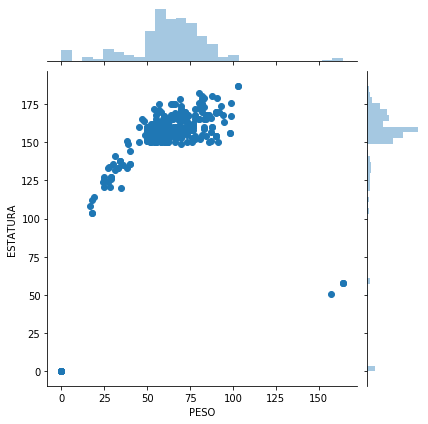

In [11]:
sns.jointplot(x="PESO", y="ESTATURA", data=base)

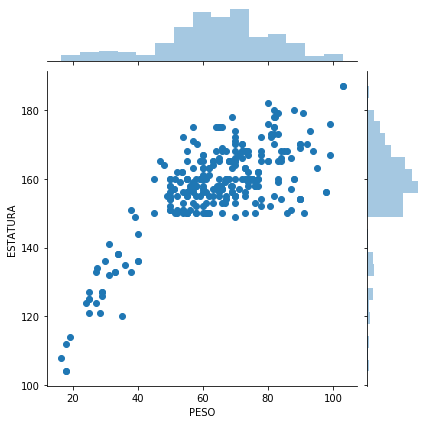

In [12]:
base_100 = base[base['ESTATURA']>=100]
sns.jointplot(x="PESO", y="ESTATURA", data=base_100)#, kind="hex")

As we can see when `PESO` is lower than 50 there is a positive correlation between those two variables. Nevertheless after that value `ESTATURA` y `PESO` does not have that strong relationship. Maybe could be interesting to calculate $IMC$.

### DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS

In [13]:
base['DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS'].unique()

array([' ASMA PREDOMINANTEMENTE ALERGICA [9601] ',
       ' ARTRITIS JUVENIL, NO ESPECIFICADA [10500] / EDEMA ANGIONEUROTICO [14271] / URTICARIA, NO ESPECIFICADA [10262] / GASTRITIS, NO ESPECIFICADA [9865] / NAUSEA Y VOMITO [12848] ',
       ' ASMA PREDOMINANTEMENTE ALERGICA [9601] / PANSINUSITIS CRONICA [9552] / DOLOR EN MIEMBRO [10858] / ENFERMEDAD DE PARKINSON [8426] / HIPOTIROIDISMO, NO ESPECIFICADO [7633] ',
       ' ARTRITIS REUMATOIDE, NO ESPECIFICADA [10486] / ASMA PREDOMINANTEMENTE ALERGICA [9601] / INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFICADO [11186] / ASMA, NO ESPECIFICADA [9604] / ENFERMEDADES REUMATICAS DEL ENDOCARDIO, VALVULA NO ESPECIFICADA [9115] / RINITIS ALERGICA, NO ESPECIFICADA [9544] ',
       ' ENFERMEDAD DEL REFLUJO GASTROESOFAGICO SIN ESOFAGITIS [9809] / OTRAS VASCULITIS LIMITADAS DE LA PIEL [10437] / OTRAS ARTRITIS REUMATOIDEAS ESPECIFICADAS [10485] / HIPERLIPIDEMIA NO ESPECIFICADA [7912] / OTRAS URTICARIAS [10261] ',
       ' EOSINOFILIA PULMONAR, NO CLA

Hay demasiadas categorías diferentes, se puede hacer un análisis más profundo para entender si se debe tomar sólo el numérico.

## MEDICAMENTO_SOSPECHOSO

In [14]:
base['MEDICAMENTO_SOSPECHOSO'].unique()

array(['FORMOTEROL  FUMARATO + BUDESONIDA 320 MCG + 9 MCG  POLVO PARA INHALACIÓN',
       'CICLOSPORINA 50 MG/ML SOLUCION INYECTABLE',
       'OMALIZUMAB 150 MG/ 1.2 ML POLVO PARA RECONSTITUIR A SALUCIÓN INYECTABLE',
       'MONTELUKAST SÓDICO 10 MG TABLETA ',
       'SALMETEROL XINAFOATO + FLUTICASONA PROPIONATO 25 MCG + 250 MCG SUSPENSIÓN PARA INHALACIÓN',
       nan,
       'INMUNOGLOBINA G HUMANA NORMAL 50 MG/ML POLVO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE',
       'FORMOTEROL  FUMARATO + BUDESONIDA 160 MCG + 4.5 MCG  POLVO PARA INHALACIÓN',
       'INMUNOGLOBULINA HUMANA 6 G POLVO PARA RECONSTITUIR A SOLUCIÓN INYECTABLE',
       'TRIMETOPRIM + SULFAMETOXAZOL 80 MG + 400 MG TABLETA',
       'OMALIZUMAB 150MG /1ML SLN INYECTABLE ',
       'FEXOFENADINA 180 MG 180 MG + TABLETA RECUBIERTA',
       'BENRALIZUMAB 30MG + SLN INYECTABLE',
       'DUPILUMAB 300MG/2ML JERINGA PRELLENA (DUPIXENT)   300 MG SOLUCION INYECTABLE ',
       'BECLOMETASONA DIPROPIONATO 50 MCG SPRAY NASAL',
       

In [15]:
base['MEDICAMENTO_SOSPECHOSO_1w'] = base['MEDICAMENTO_SOSPECHOSO'].apply( lambda x : str(x).split(' ')[0])

In [16]:
base['MEDICAMENTO_SOSPECHOSO_1w'].unique()

array(['FORMOTEROL', 'CICLOSPORINA', 'OMALIZUMAB', 'MONTELUKAST',
       'SALMETEROL', 'nan', 'INMUNOGLOBINA', 'INMUNOGLOBULINA',
       'TRIMETOPRIM', 'FEXOFENADINA', 'BENRALIZUMAB', 'DUPILUMAB',
       'BECLOMETASONA', 'MEPOLIZUMAB', 'OLODATEROL'], dtype=object)

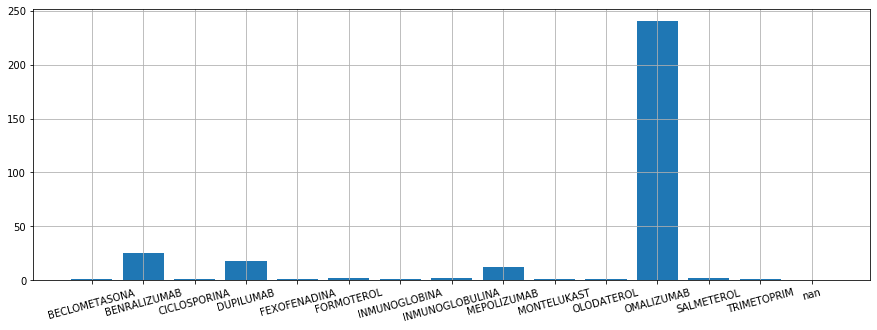

In [18]:
bg = base.groupby('MEDICAMENTO_SOSPECHOSO_1w')['MEDICAMENTO_SOSPECHOSO'].count().reset_index(name='cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg['MEDICAMENTO_SOSPECHOSO_1w'], bg['cuenta'] )
_ = plt.xticks(rotation=15)
plt.grid()

As we can see, most of the observations are for `OMALIZUMAB`

### INDICATION

In [19]:
base['INDICACION'].unique()

array(['ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ]',
       'EDEMA ANGIONEUROTICO [ 14271 ]', 'ASMA, NO ESPECIFICADA [ 9604 ]',
       'OTRAS VASCULITIS LIMITADAS DE LA PIEL [ 10437 ]', ' [ 0 ]',
       'HIPOGAMMAGLOBULINEMIA NO FAMILIAR [ 7571 ]',
       'OTRAS URTICARIAS [ 10261 ]',
       'URTICARIA, NO ESPECIFICADA [ 10262 ]', 'ASMA MIXTA [ 9603 ]',
       'URTICARIA ALERGICA [ 10254 ]', 'URTICARIA IDIOPATICA [ 10255 ]',
       'URTICARIA DEBIDA AL CALOR Y AL FRIO [ 10256 ]',
       'OTRAS INMUNODEFICIENCIAS ESPECIFICADAS [ 7604 ]',
       'RINOFARINGITIS AGUDA (RESFRIADO COMUN) [ 9469 ]',
       'RINITIS ALERGICA, NO ESPECIFICADA [ 9544 ]',
       'HIPOGAMMAGLOBULINEMIA TRANSITORIA DE LA INFANCIA [ 7577 ]',
       'URTICARIA DERMATOGRAFICA [ 10257 ]', 'ASMA NO ALERGICA [ 9602 ]'],
      dtype=object)

In [20]:
bg = base.groupby(['MEDICAMENTO_SOSPECHOSO_1w','INDICACION'])['MEDICAMENTO_SOSPECHOSO'].count().reset_index(name='cuenta')
bg

,MEDICAMENTO_SOSPECHOSO_1w,INDICACION,cuenta
0,BECLOMETASONA,"ASMA, NO ESPECIFICADA [ 9604 ]",1
1,BENRALIZUMAB,ASMA MIXTA [ 9603 ],7
2,BENRALIZUMAB,ASMA NO ALERGICA [ 9602 ],1
3,BENRALIZUMAB,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],10
4,BENRALIZUMAB,"ASMA, NO ESPECIFICADA [ 9604 ]",7
5,CICLOSPORINA,EDEMA ANGIONEUROTICO [ 14271 ],1
6,DUPILUMAB,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],7
7,DUPILUMAB,"ASMA, NO ESPECIFICADA [ 9604 ]",11
8,FEXOFENADINA,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],1
9,FORMOTEROL,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],2


In [21]:
bg2 = bg[bg['cuenta']>1].groupby(['INDICACION'])['cuenta'].sum().reset_index(name='cuenta').\
    sort_values('cuenta', ascending = False)
bg2

,INDICACION,cuenta
1,ASMA PREDOMINANTEMENTE ALERGICA [ 9601 ],126
2,"ASMA, NO ESPECIFICADA [ 9604 ]",79
6,"URTICARIA, NO ESPECIFICADA [ 10262 ]",38
0,ASMA MIXTA [ 9603 ],12
3,OTRAS URTICARIAS [ 10261 ],12
4,URTICARIA ALERGICA [ 10254 ],12
5,URTICARIA IDIOPATICA [ 10255 ],11


We can stay with these five categories. Other can stay as other.

In [22]:
base_ = base.merge( bg2, how = 'left')
base_.head()

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO,EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO,EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED,PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION,MEDICAMENTO_SOSPECHOSO_1w,cuenta
0,2013-08-05,ANTIOQUIA,GIRARDOTA,EPS/SURA,MESTIZO,1977-09-06,42,CC,1706844,F,...,SI,SI,NO SABE,NO SABE,POSIBLE,NaN,LEVE,SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENT...,FORMOTEROL,126.0
1,2013-03-05,ANTIOQUIA,ITAGUI,EPS/SURA,MESTIZO,1972-09-09,47,CC,1452148,F,...,SI,SI,NO,SI,POSIBLE,NO,MODERADA,SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA ...,CICLOSPORINA,NaN
2,2013-03-06,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1966-10-02,53,CC,730790,F,...,SI,SI,NO SABE,NO,POSIBLE,NO,MODERADA,SE COMUNICARA CASO AL MEDICO TRATANTE,OMALIZUMAB,126.0
3,2013-03-06,ANTIOQUIA,RIONEGRO,EPS/SURA,MESTIZO,1982-12-24,37,CC,738900,F,...,SI,SI,NO SABE,SI,POSIBLE,NO,MODERADA,CONTINUAR EN SFT,MONTELUKAST,79.0
4,2013-08-15,ANTIOQUIA,BELLO,EPS/SURA,MESTIZO,1974-08-21,45,CC,1479905,M,...,NaN,NaN,NO SABE,NO SABE,POSIBLE,NO,LEVE,PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA A...,OMALIZUMAB,NaN


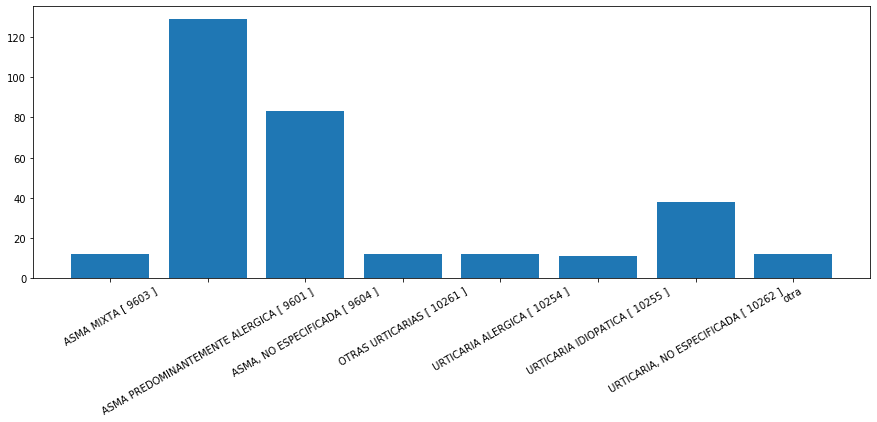

In [23]:
import math

base_['INDICACION_CAT']=base_.apply( lambda x : 'otra' if math.isnan(x['cuenta']) else x['INDICACION'] , axis = 1  )
bg = base_.groupby('INDICACION_CAT')['DEPARTAMENTO'].count().reset_index(name='cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg['INDICACION_CAT'], bg['cuenta'] )
_ = plt.xticks(rotation=30)

### FECHA_INICIO_TRATAMIENTO y FECHA_FIN_TRATAMIENTO

In [24]:
base_['FECHA_INICIO_TRATAMIENTO_ym'] = base_['FECHA_INICIO_TRATAMIENTO'].apply( lambda x: x.year * 100 + x.month )
base_['FECHA_FIN_TRATAMIENTO_ym']    = base_['FECHA_FIN_TRATAMIENTO'].apply( lambda x: x.year * 100 + x.month )
base_[['FECHA_INICIO_TRATAMIENTO_ym','FECHA_FIN_TRATAMIENTO_ym']].describe()

,FECHA_INICIO_TRATAMIENTO_ym,FECHA_FIN_TRATAMIENTO_ym
count,308.000000,138.000000
mean,201659.672078,201787.108696
std,232.217647,81.655470
min,200901.000000,201301.000000
25%,201505.000000,201805.000000
50%,201612.000000,201805.000000
75%,201905.250000,201806.000000
max,202004.000000,201912.000000


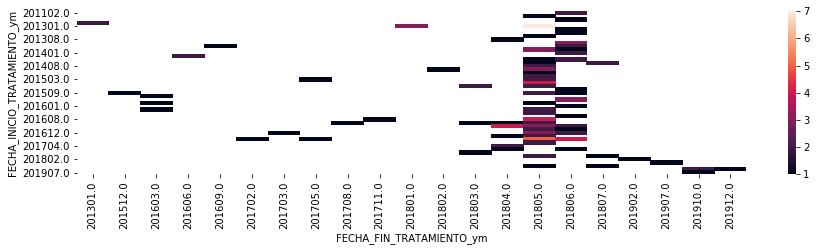

In [25]:
bg = base_.groupby(['FECHA_INICIO_TRATAMIENTO_ym','FECHA_FIN_TRATAMIENTO_ym'])['FECHA_INICIO_TRATAMIENTO'].count().\
    reset_index(name='cuenta')

df_gwh_pivot = bg.pivot('FECHA_INICIO_TRATAMIENTO_ym','FECHA_FIN_TRATAMIENTO_ym','cuenta')

fig, ax = plt.subplots(figsize=(15, 3))
_ = sns.heatmap( df_gwh_pivot, ax=ax )

Most of end dates are in 201805 and 201806.

### COMERCIAL

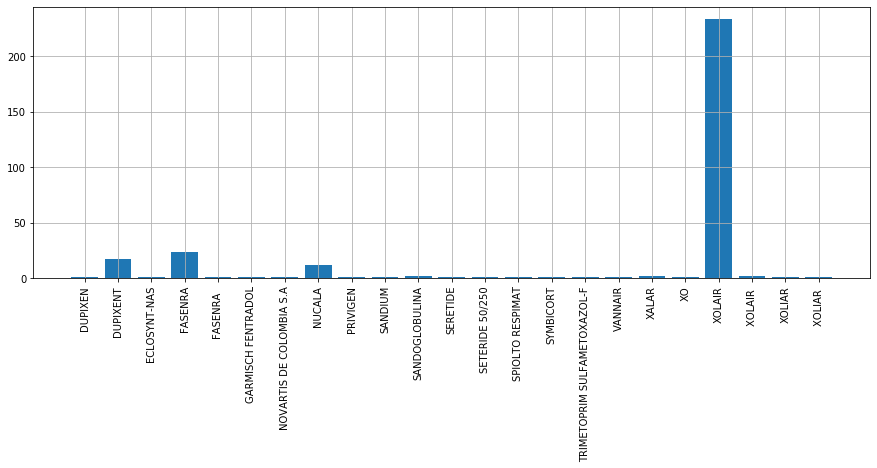

In [26]:
bg = base_.groupby('COMERCIAL')['DEPARTAMENTO'].count().reset_index(name='cuenta')

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg['COMERCIAL'], bg['cuenta'] )
_ = plt.xticks(rotation=90)
plt.grid(True)

The most frequent comercial is `XOLAR`. There is necesary to do some cleaning because there are some typos for this category.

In [29]:
base_['COMERCIAL_cat'] = base_['COMERCIAL'].apply( lambda x: 'XOLAIR' if str(x)[0] == 'X' else 'otro' )

### RAM_SOSPECHADA

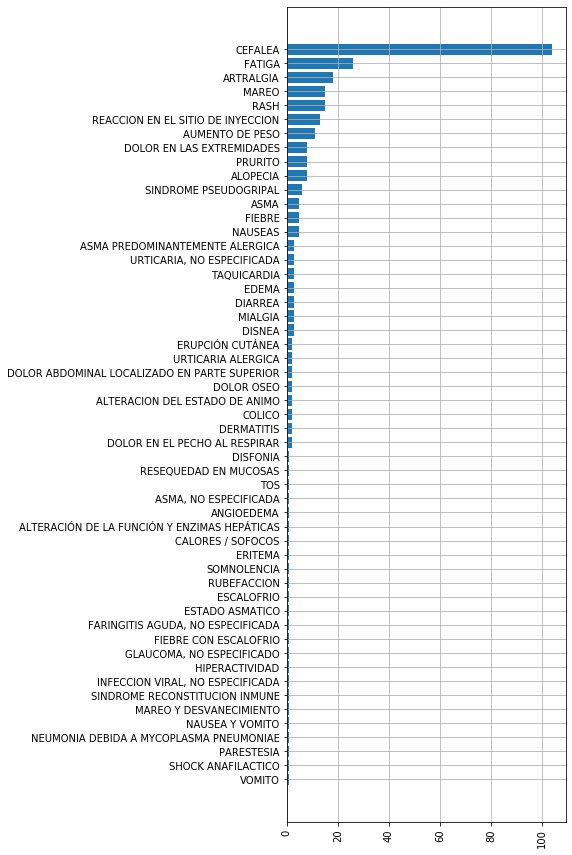

In [34]:
bg = base_.groupby('RAM_SOSPECHADA')['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(5, 15))
ax.barh(bg['RAM_SOSPECHADA'], bg['cuenta'] )
_ = plt.xticks(rotation=90)
plt.grid(True)

### SISTEMA_COMPROMETIDO

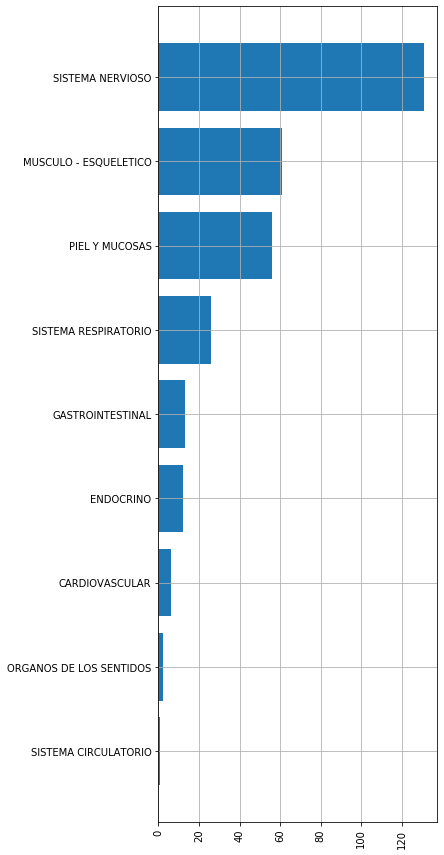

In [36]:
variable = 'SISTEMA_COMPROMETIDO'

bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(5, 15))
ax.barh(bg[variable], bg['cuenta'] )
_ = plt.xticks(rotation=90)
plt.grid(True)

### ANALISIS

In [39]:
base_['ANALISIS'].unique()

array(['PACIENTE CON DIAGNOSTICO DE ASMA, INICIO EN ABRIL TRATAMIENTO CON FORMOTEROL/BUDESONIDA 320/9 MCG 2 INH CADA 12 HORAS, OMALIZUMAB 150 MG INICIO 18 DE JUNIO 150 MG MENSUALES IG E TOTAL 148.9, SE REALIZA COMUNICACION TELEFONICA PARA EVALUAR SEGURIDAD DEL TRATAMIENTO, PACIENTE REFIERE AL MOMENTO DE USAR SYMBICORT MUCHA TAQUICARDIA, MAREO, CON OMALIZUMAB DOLOR DE CABEZA ASOCIADO A LA APLICACION DEL MEDICAMENTO. PACIENTE CON ANTECEDENTES DE MIGRAÑA TOMANDO MELOXICAM.  PACIENTE CON DIAGNOSTICO DE ASMA, INICIO EN ABRIL TRATAMIENTO CON FORMOTEROL/BUDESONIDA 320/9 MCG 2 INH CADA 12 HORAS, OMALIZUMAB 150 MG INICIO 18 DE JUNIO 150 MG MENSUALES IG E TOTAL 148.9, SE REALIZA COMUNICACION TELEFONICA PARA EVALUAR SEGURIDAD DEL TRATAMIENTO, PACIENTE REFIERE AL MOMENTO DE USAR SYMBICORT MUCHA TAQUICARDIA, MAREO, CON OMALIZUMAB DOLOR DE CABEZA ASOCIADO A LA APLICACION DEL MEDICAMENTO. PACIENTE CON ANTECEDENTES DE MIGRAÃ±A TOMANDO MELOXICAM. EN LA LITERATURA SE ENCUENTRA RE',
       'PACIENTE REFI

### EVOLUCION 

In [40]:
base_['EVOLUCION'].unique()

array(['RECUPERADO SIN SECUELAS', 'AUN SIN RECUPERACION', nan,
       'RECUPERADO CON SECUELAS'], dtype=object)

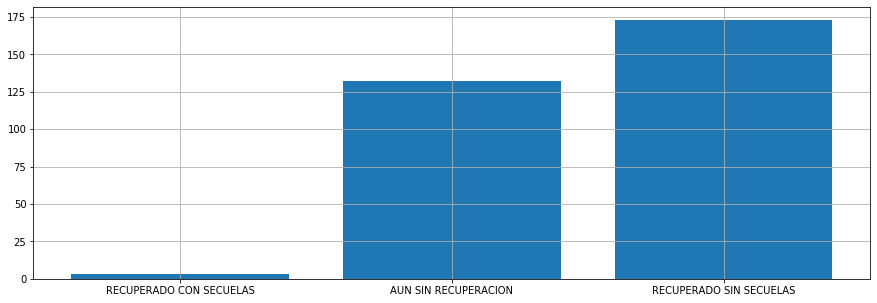

In [44]:
variable = 'EVOLUCION'

bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### SERIEDAD

In [45]:
base_['SERIEDAD'].unique()

array(['OTROS', 'DESCONOCIDO', nan, 'CONDICIÓN MÉDICA IMPORTANTE',
       'PRODUJO PROLONGO HOSPITALIZACION'], dtype=object)

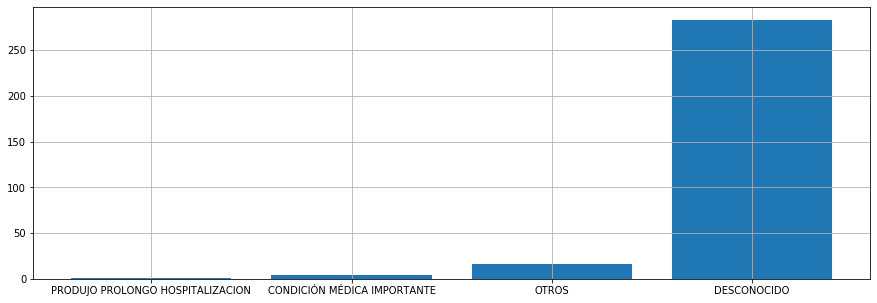

In [46]:
variable = 'SERIEDAD'

bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO'EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO

In [48]:
variable = 'EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO'
base_[variable].unique()

array(['SI', nan, 'NO SABE', 'NO'], dtype=object)

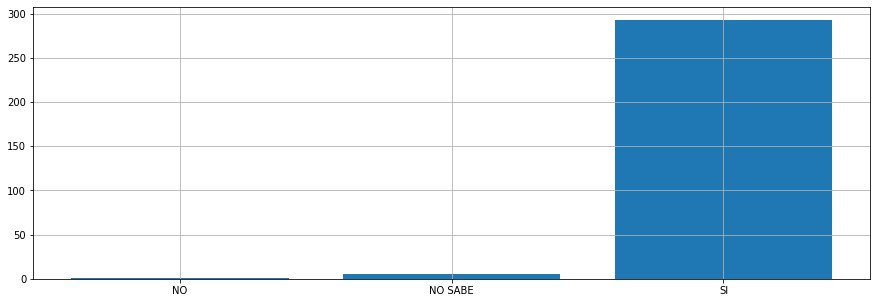

In [49]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED

In [50]:
variable = 'EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED'
base_[variable].unique()

array(['NO SABE', 'NO', 'SI', nan], dtype=object)

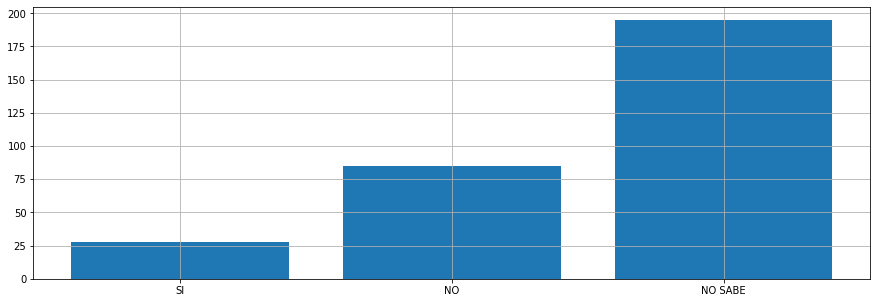

In [51]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO

In [52]:
variable = 'EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO'

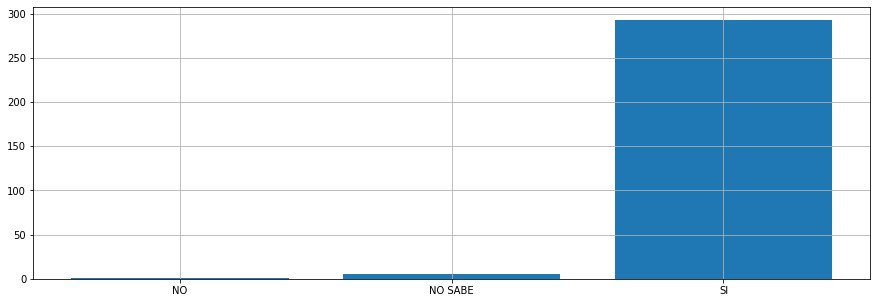

In [53]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC

In [54]:
variable = 'PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC'

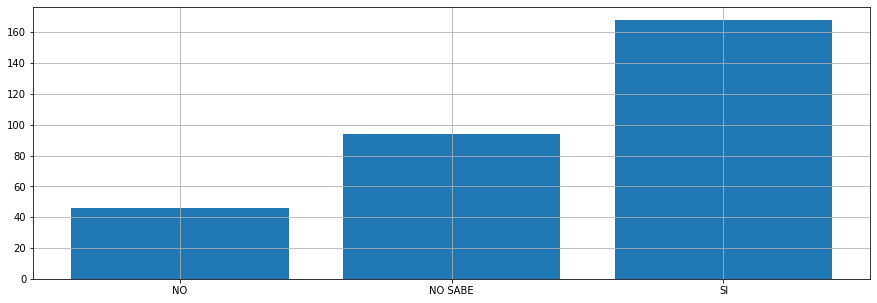

In [55]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO

In [56]:
variable = 'CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO'

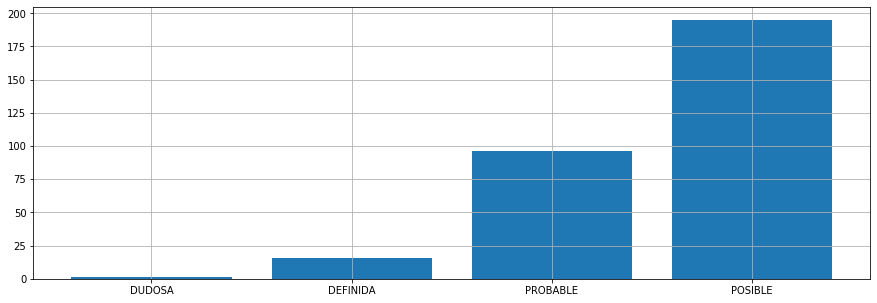

In [57]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### EVITABILIDAD

In [ ]:
variable = 'EVITABILIDAD'

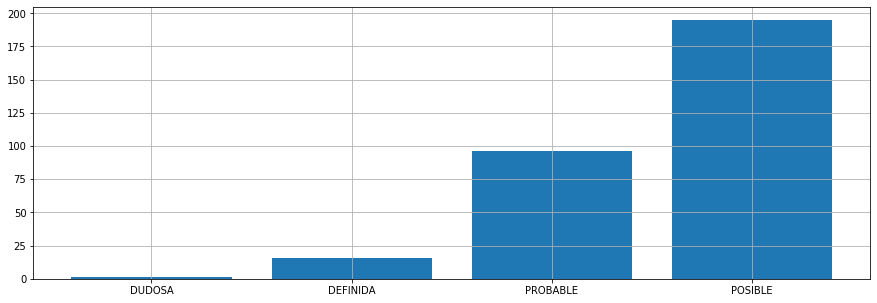

In [59]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### GRAVEDAD

In [60]:
variable = 'GRAVEDAD'

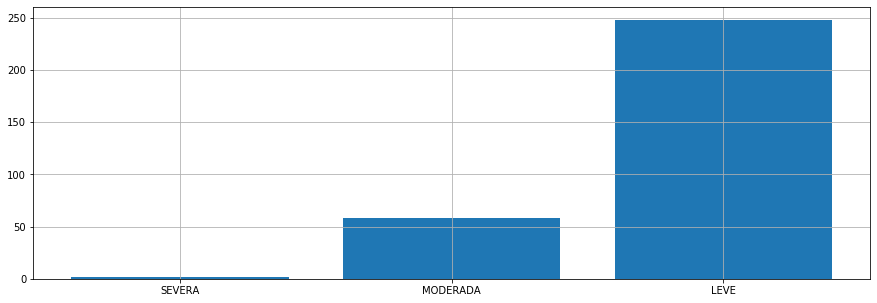

In [61]:
bg = base_.groupby(variable)['DEPARTAMENTO'].count().reset_index(name='cuenta').sort_values('cuenta', ascending = True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(bg[variable], bg['cuenta'] )
#_ = plt.xticks(rotation=90)
plt.grid(True)

### DS_PLAN_INTERVENCION

In [62]:
variable = 'DS_PLAN_INTERVENCION'

In [66]:
base_['DS_PLAN_INTERVENCION'].unique()

array(['SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENTO TAL CUAL COMO LOS TIENE ORDENADOS Y CONSULTAR CON MEDICO DE CONTROL DE ASMA, PARA EVALUAR MEDICAMENTOS USADOS A LA FECHA, SE RECUERDA LA IMPORTANCIA DE ',
       'SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA SUSPENDER LOS MEDICAMENTOS POR SU CUENTA, SIEMPRE CONSULTAR INMEDIATEMANETE A URGENCIAS, SEGUN LITERATURA ESTAS REACCIONES SON COMUNES PARA EL MEDICAMMENT',
       'SE COMUNICARA CASO AL MEDICO TRATANTE', 'CONTINUAR EN SFT',
       'PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA APLICAICON DEL MEDIACMENTO. MUY CONTENTO CON LA EVOLUCION, MENCIONA QUE A MEDIDA QUE PASAN LAS APLICAICONES DEL MEDIACMENTO LA INTENSIDAD DEL DOLOR DE CABE',
       'REALIZAR SFT A RAM PRESENTADA',
       'SE RECUERDA IMPORTANCIA DE MANTENER ADHERENCIA AL TRATAMIENTO Y EVITAR RUPTURAS SEGUIR USANDO SUS MEDICAMENTOS SEGUN LA PAUTA RECOMENDADA. EVITAR FACTORES DESENCADENANTE DE LA ENFERMEDAD, REALIZAR TRA',
       'SE INIDICA QUE A PESAR DE LA PRESENCIA D

In [28]:
base_.columns

Index(['FECHA_NOTIFICACION', 'DEPARTAMENTO', 'MUNICIPIO', 'EPS', 'ETNIA',
       'FECHA_NACIMIENTO', 'EDAD', 'TIPO_IDENTIFICACION', 'NRO_IDENTIFICACION',
       'SEXO', 'PESO', 'ESTATURA', 'DIAGNOSTICO_PPAL_CONDICIONES_CLINICAS',
       'MEDICAMENTO_SOSPECHOSO', 'INDICACION', 'FECHA_INICIO_TRATAMIENTO',
       'FECHA_FIN_TRATAMIENTO', 'COMERCIAL', 'FECHA_INICIO_REACCION',
       'RAM_SOSPECHADA', 'SISTEMA_COMPROMETIDO', 'ANALISIS', 'EVOLUCION',
       'SERIEDAD', 'EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO',
       'EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO',
       'EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED',
       'PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC',
       'CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO', 'EVITABILIDAD', 'GRAVEDAD',
       'DS_PLAN_INTERVENCION', 'MEDICAMENTO_SOSPECHOSO_1w', 'cuenta',
       'INDICACION_CAT', 'FECHA_INICIO_TRATAMIENTO_ym',
       'FECHA_FIN_TRATAMIENTO_ym', 'COMERCIAL_cat'],
      dtype='object')

## 5. Definiciones Modelo de Datos
### 5.1 Transformación y Limpieza

* Esta tabla debería consolidarse a nivel ID, Fecha. Esto implica una definición de variables explicativas ya que un paciente puede aparecer más de una vez por mes.